# Text Data EDA and Processing

**Note:** focus on 'name_processed' column.

## Imports

In [1]:
#%pip install wordcloud

In [2]:
#%pip install textblob

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from nltk import bigrams
import networkx as nx
from textblob import TextBlob

## Import Cleaned Data

In [4]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

clean_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,total_of_host_listings_count
0,879181,287172,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,female,2
1,6606,14942,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,0.95,99,2,fab privat seattl urban cottag,female,3
2,902609,3264544,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,1.95,206,27,entir guest suit inest seattl,male,5
3,9419,30559,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,1.14,356,20,gloriou sun room memori foamb,male,9
4,226536,209571,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,female,1


## Visualizations and Analysis of Text Data

In [5]:
# Assuming you have the dataframe 'data' containing the dataset
name_data = clean_data['name_processed']

name_data.head(20)

0                      jimi hendrix neighborhood 3
1                   fab privat seattl urban cottag
2                    entir guest suit inest seattl
3                    gloriou sun room memori foamb
4      seren room sunni cottag near discoveri park
5     sunni parisian room best cool memoryfoam bed
6                       ador sweet orang craftsman
7          seattl mini homeith hot tub privat deck
8                       coolest tangerin dream mil
9                         home spaciou central fab
10             luna lower friendlyest seattl locat
11                       alki beach 12 block beach
12                     scandinavian queen ann home
13                         stylish queen ann apart
14                      orang hous quiet n central
15               charm greenwood neighborhood flat
16                beauti privat spot north ballard
17                    charm hideaway north ballard
18              cottag capitol hill oasi free park
19                     shine st

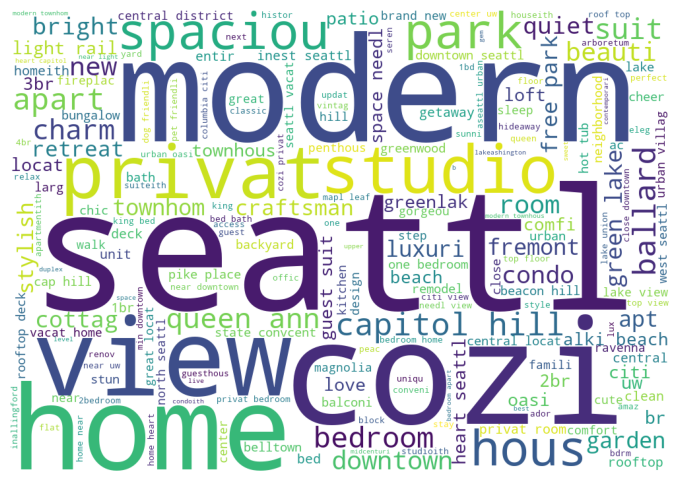

In [6]:
# Concatenate all the words in the name_processed column
all_words = ' '.join(name_data)

# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 700, background_color = "white").generate(all_words)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Note:** The name_data column contains processed names of the Airbnb listings, offering insights into the unique characteristics and selling points of each listing. These names have been carefully crafted by the property owners to attract potential guests and highlight key features, amenities, and locations.

Analyzing the processed names can provide valuable information about the market appeal and desirability of the listings. Extracting common keywords, conducting sentiment analysis, or exploring topic modeling can uncover patterns and trends in the names, shedding light on the factors that contribute to the perceived value of the listings.

Furthermore, incorporating the processed names as features in machine learning models can improve predictive accuracy and help predict outcomes such as booking demand or pricing. By leveraging this textual data, we can gain deeper insights into the Airbnb market and develop data-driven recommendations for property owners and potential guests.

In [7]:
# Sort the dataset by price in ascending order and select the 1000 cheapest listings
cheapest_listings = clean_data.sort_values('price').head(1000)

cheapest_listings['name_processed'].head(20)

1660           copper corner columbia citi hot tub
3760    one bedroom two bedroom apart north seattl
3140       overnight mountain coliv spaciou room 1
4281        british room 8 min downtown light rail
4833       fireplac room 8 min downtown light rail
4817        italian room 8 min downtown light rail
4733        parlour room 8 min light rail downtown
4729          greek room 8 min downtown light rail
1292          peac room mind studio hot tub option
4735      southwest room 8 min downtown light rail
3170       overnight mountain coliv spaciou room 8
4734         seattl room 8 min downtown light rail
4731        parisian room 8min downtown light rail
1056                         blue hous sunset suit
1313                           blue hous cozi suit
3044                   ml1privat bedroom sw seattl
3910                     n seattl rose garden king
1850                      blue hous butterfli room
1399          at4 larg privat bedroom inest seattl
3167       overnight mountain c

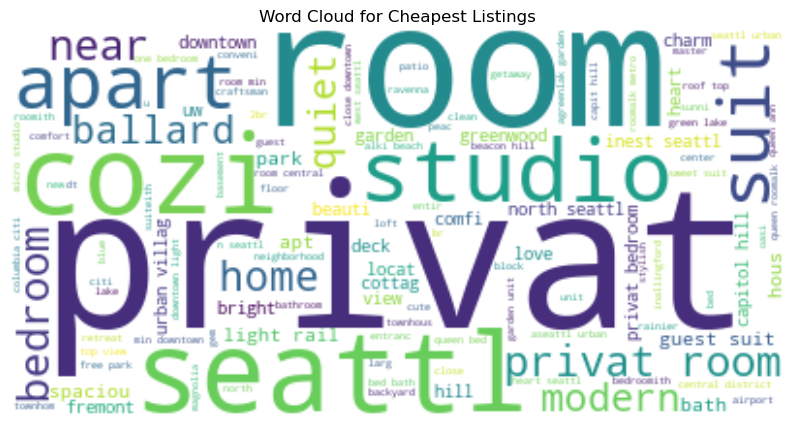

In [8]:
cheapest_words = ' '.join(cheapest_listings['name_processed'])

# Generate a word cloud for the cheapest listings
cheapest_wordcloud = WordCloud(background_color = 'white').generate(cheapest_words)

# Plot
plt.figure(figsize = (10, 6))
plt.imshow(cheapest_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cheapest Listings')
plt.show()

In [9]:
# Sort the dataset by price in descending order and select the 1000 most expensive listings
expensive_listings = clean_data.sort_values('price', ascending=False).head(1000)

expensive_listings['name_processed'].head(20)

3727                             greenwood hidden gem
3421                    greenwood tranquil lower unit
4873                             greenwood hidden gem
4060                    greenwood tranquil lower unit
3319                         greenwood seren top unit
4210                         greenwood seren top unit
3397                     stun classic lake view estat
449                                 fremont casa 2022
4039           gorgeou 6br queen ann townhous sophari
365     1 month madrona cottag begin sept 5th 1250 mo
2809        gu ii rooftop hot tub modern 5br4bth home
3283            triqu villa seattl uniqu triplex park
4141                        allstargam home away home
2268                                  greenlak henhau
4115             westseattl ork familyretreat 263unit
4491                stun 3br oceanview fireplac patio
803                 beauti seattl home quiet magnolia
4803    6b6b ballard duplex 240v evcharg rooftop park
1029                        

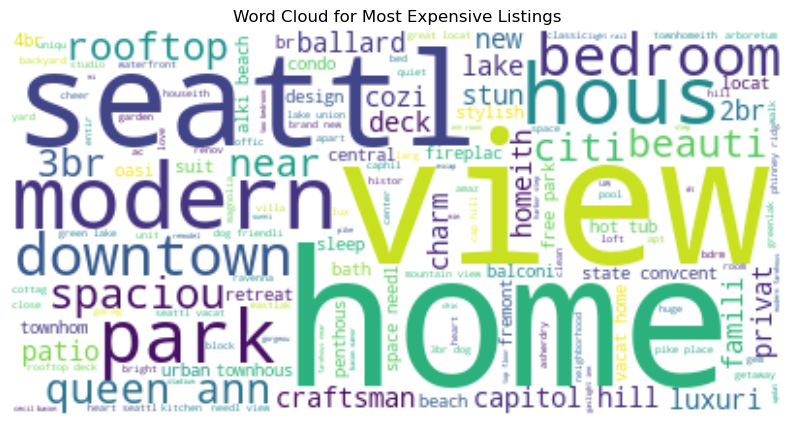

In [10]:
expensive_words = ' '.join(expensive_listings['name_processed'])

# Generate a word cloud for the most expensive listings
expensive_wordcloud = WordCloud(background_color = 'white').generate(expensive_words)

# Plot the word cloud for the most expensive listings
plt.figure(figsize = (10, 6))
plt.imshow(expensive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Expensive Listings')
plt.show()

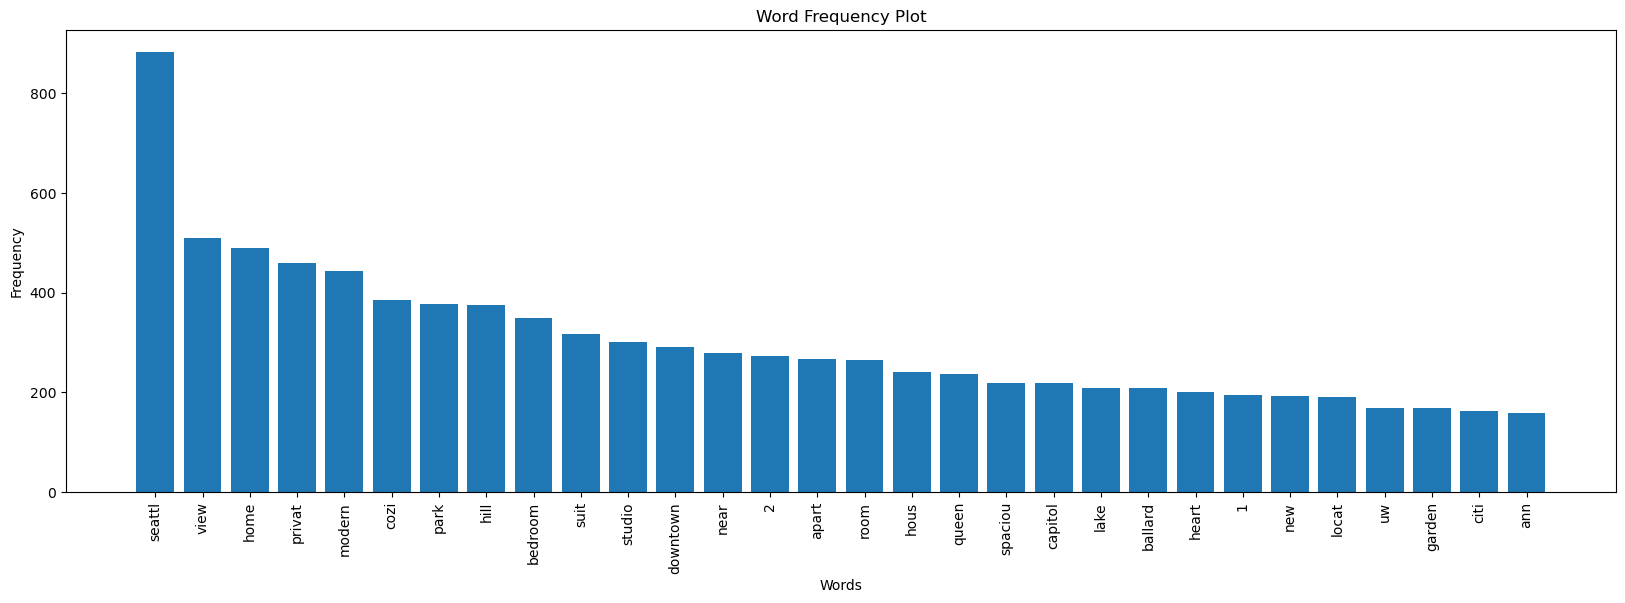

In [11]:
word_freq = FreqDist(' '.join(clean_data['name_processed']).split())

# Sort word frequencies in descending order
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their frequencies
N = 30 
top_words = [word for word, freq in sorted_freq[:N]]
top_freq = [freq for word, freq in sorted_freq[:N]]

# Plot
plt.figure(figsize = (20, 6))
plt.bar(top_words, top_freq)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Plot')
plt.xticks(rotation = 90)
plt.show()

## Text Data Processing

In [12]:
# Tokenization
vectorizer = CountVectorizer()
name_tokens = vectorizer.fit_transform(name_data)

In [13]:
name_tokens

<4917x3068 sparse matrix of type '<class 'numpy.int64'>'
	with 25450 stored elements in Compressed Sparse Row format>

In [14]:
# Frequency Analysis
word_freq = pd.DataFrame(name_tokens.toarray(), columns = vectorizer.get_feature_names())

/Users/noraadadurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
word_freq

,04,045,08,10,1000,100salkscor,100walkscor,101,1010,102,...,ye,yellow,yesler,yet,yigibu,yourarm,zaneluppo,zen,zoo,zouthern
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Topic Modeling (Assuming you want to extract 5 topics)
lda_model = LatentDirichletAllocation(n_components = 5, random_state = 42)
topic_weights = lda_model.fit_transform(name_tokens)

In [17]:
topic_weights

array([[0.05008716, 0.05000151, 0.0500018 , 0.79990808, 0.05000145],
       [0.40613323, 0.03345099, 0.03393413, 0.21514585, 0.31133581],
       [0.03349319, 0.03368138, 0.0341224 , 0.03352751, 0.86517552],
       ...,
       [0.32834207, 0.54985712, 0.04023872, 0.04146036, 0.04010174],
       [0.44869202, 0.3088921 , 0.0254358 , 0.02516456, 0.19181552],
       [0.41586525, 0.0346071 , 0.03387444, 0.48080304, 0.03485017]])

In [18]:
unique_words = clean_data['name_processed'].str.split(expand=True).stack().unique().tolist()

unique_words[:50]

['jimi',
 'hendrix',
 'neighborhood',
 '3',
 'fab',
 'privat',
 'seattl',
 'urban',
 'cottag',
 'entir',
 'guest',
 'suit',
 'inest',
 'gloriou',
 'sun',
 'room',
 'memori',
 'foamb',
 'seren',
 'sunni',
 'near',
 'discoveri',
 'park',
 'parisian',
 'best',
 'cool',
 'memoryfoam',
 'bed',
 'ador',
 'sweet',
 'orang',
 'craftsman',
 'mini',
 'homeith',
 'hot',
 'tub',
 'deck',
 'coolest',
 'tangerin',
 'dream',
 'mil',
 'home',
 'spaciou',
 'central',
 'luna',
 'lower',
 'friendlyest',
 'locat',
 'alki',
 'beach']